## Image Processing using convolution

Each pixel in original image undergoes a transformation.

Using a fixed 'kernel', for example
\begin{equation*}
kernel = \begin{bmatrix}
0 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 0
\end{bmatrix}
\end{equation*}

For each pixel create a matrix centered around it with dimensions of the kernel and do element-wise multiplaction

Replace the value of the pixel with avereage, or max, or min

In [2]:
from PIL import Image
import numpy as np

from skimage import io
from skimage import data
from scipy.signal import convolve2d

In [3]:
# scans across image in 3x3 chuncks and multiplies each pixel value by 0.1
# Then we sum the 3x3 chunk 

kernel_1 = [[0,0,0],
          [0,1,0],
          [0,0,0]]

kernel_2 = [[0.1,0.1,0.1],
          [0.1,0.1,0.1],
          [0.1,0.1,0.1]]

kernel_3 = [[0,0,0],
          [0,2,0],
          [0,0,0]]

kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

kernel_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

kernel_reduce_noise = 1/9.*np.array([[1,1,1],[1,1,1],[1,1,1]])

In [8]:
image = io.imread('../Resources/dog.jpg', as_gray=True)

In [9]:
image.shape

(300, 332)

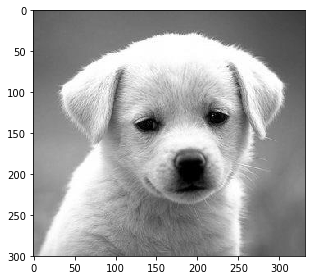

In [12]:
# new_image = convolve2d(image, kernel_1).clip(0.0, 1.0)
io.imshow(image)

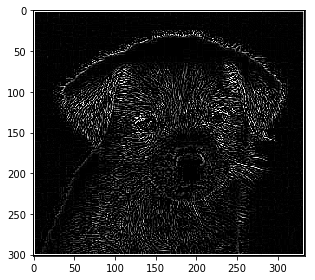

In [14]:
new_image = convolve2d(image, kernel_edge).clip(0.0, 1.0)
io.imshow(new_image)

In [7]:
# 0 padding applied around original image
new_image.shape

(302, 334)

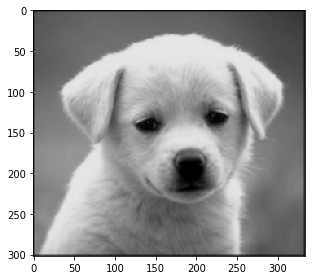

In [8]:
new_image = convolve2d(image, kernel_2).clip(0.0, 1.0)
io.imshow(new_image)

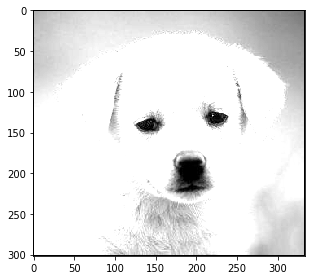

In [9]:
new_image = convolve2d(image, kernel_3).clip(0.0, 1.0)
io.imshow(new_image)

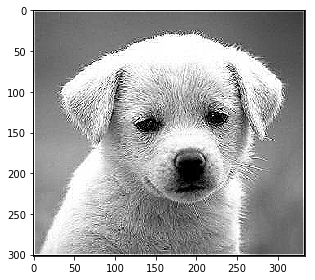

In [10]:
new_image = convolve2d(image, kernel_sharp).clip(0.0, 1.0)
io.imshow(new_image)

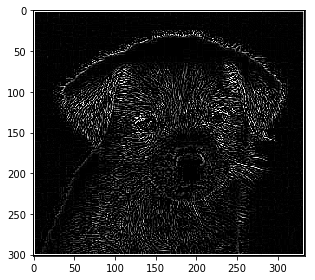

In [11]:
new_image = convolve2d(image, kernel_edge).clip(0.0, 1.0)
io.imshow(new_image)

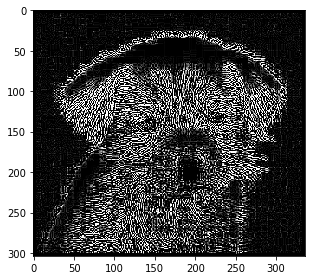

In [12]:
# apply sharpen and edge
i_sharpen = convolve2d(image, kernel_sharp).clip(0.0, 1.0)
i_edge = convolve2d(i_sharpen, kernel_edge).clip(0.0, 1.0)
io.imshow(i_edge)

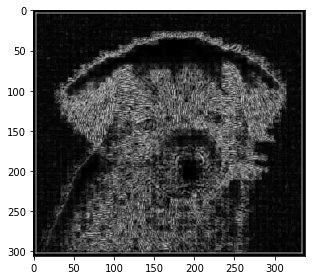

In [13]:
# apply sharpen and edge and reduce noise
i_sharpen = convolve2d(image, kernel_sharp).clip(0.0, 1.0)
i_edge = convolve2d(i_sharpen, kernel_edge).clip(0.0, 1.0)
i_reduce_noise = convolve2d(i_edge, kernel_reduce_noise).clip(0.0, 1.0)
io.imshow(i_reduce_noise)